In [17]:
import geopandas as gpd

# Load the shapefile
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)

# View the first few rows of the data
gdf

,Area,S_No,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,...,F_SC,P_ST,M_ST,F_ST,Shape_Leng,Shape_Area,Mandal_Nam,Dist_Name,N_Revenue,geometry
0,255.0,415.0,37246.0,156067.0,79754.0,76313.0,17498.0,9151.0,8347.0,22004.0,...,10652.0,4146.0,2175.0,1971.0,0.958283,25307.330556,Abdullapurmet,Rangareddy,Ibrahimpatnam,"POLYGON ((78.59021 17.34506, 78.59009 17.34537..."
1,42.0,254.0,81040.0,335634.0,168831.0,166803.0,34494.0,17809.0,16685.0,36193.0,...,18060.0,5275.0,2717.0,2560.0,0.367891,4177.055039,Alwal,Medchal_Malkajgiri,Malkajgiri,"POLYGON ((78.51263 17.54925, 78.51385 17.54926..."
2,9.0,42.0,0.0,153558.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.154793,900.197220,Amberpet,Hyderabad,HYDERABAD,"POLYGON ((78.50988 17.40368, 78.51045 17.40257..."
3,4.0,43.0,0.0,59070.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.110755,354.121058,Ammerpet,Hyderabad,Secundrabad,"POLYGON ((78.43753 17.45438, 78.44026 17.45392..."
4,13.0,44.0,0.0,442229.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.146785,1318.621108,Asifnagar,Hyderabad,HYDERABAD,"POLYGON ((78.46198 17.40011, 78.46107 17.39865..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,38.0,442.0,11079.0,45439.0,23338.0,22101.0,6152.0,3116.0,3036.0,5010.0,...,2470.0,809.0,415.0,394.0,0.288320,3826.735569,Ameenpur,Sangareddy,Sangareddy,"POLYGON ((78.32815 17.57665, 78.32622 17.57528..."
67,111.0,447.0,15143.0,60218.0,32619.0,27599.0,7968.0,4119.0,3849.0,6607.0,...,3168.0,1223.0,895.0,328.0,0.675664,11095.798099,Jinnaram,Sangareddy,Sangareddy,"POLYGON ((78.3306 17.67159, 78.33072 17.67158,..."
68,113.0,252.0,8614.0,38637.0,19222.0,19415.0,4695.0,2441.0,2254.0,5949.0,...,3073.0,978.0,480.0,498.0,0.557058,11342.642145,Toopran,Medak,Tupran,"POLYGON ((78.52477 17.89601, 78.52487 17.89596..."
69,87.0,240.0,6020.0,25903.0,13065.0,12838.0,3252.0,1720.0,1532.0,4238.0,...,2188.0,528.0,266.0,262.0,0.463699,8736.113746,Manoharabad,Medak,Tupran,"POLYGON ((78.45379 17.81761, 78.45385 17.81757..."


In [18]:
# Check the Coordinate Reference System
print(gdf.crs)

# List the columns (attributes) in the GeoDataFrame
print(gdf.columns)


EPSG:4326
Index(['Area', 'S_No', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06',
       'F_06', 'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST', 'Shape_Leng',
       'Shape_Area', 'Mandal_Nam', 'Dist_Name', 'N_Revenue', 'geometry'],
      dtype='object')


<Axes: >

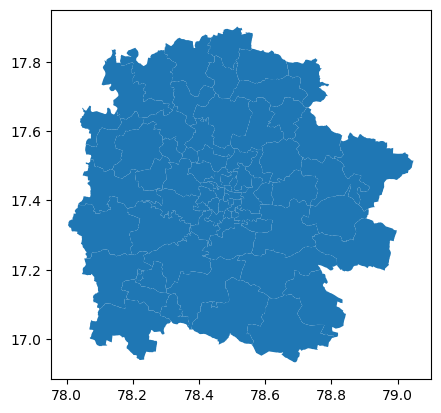

In [19]:
gdf.plot()

In [20]:
bbox = gdf.total_bounds
print(bbox)


[78.00405826 16.93264351 79.04971836 17.90150706]


In [21]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colorbar as colorbar
import os

minVal = 0.02
maxVal = 0.045
diff = maxVal - minVal

def plot_geotiff_image(geotiff_path, title,file_name):
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'blue_to_red',
        [
            (0.0, [0, 0, 1]),            # Blue at x=0.0
            (0.14, [0, 0.5, 1]),         # Blue-Cyan at x=0.14
            (0.28, [0, 1, 1]),           # Cyan at x=0.28
            (0.42, [0, 1, 0.5]),         # Cyan-Green at x=0.42
            (0.57, [0, 1, 0]),           # Green at x=0.57
            (0.71, [1, 1, 0]),           # Yellow at x=0.71
            (0.85, [1, 0.5, 0]),         # Orange at x=0.85
            (1.0, [1, 0, 0])             # Red at x=1.0
        ]
    )
    norm = mcolors.Normalize(vmin=minVal, vmax=maxVal)
    full_path=os.path.join(r"C:\Users\rishi\ml_projects\climate\Intermediate outputs\CO_images_all - Copy",geotiff_path)
    with rasterio.open(full_path) as src:
        fig, ax = plt.subplots(figsize=(12, 10))
        show(src, ax=ax)
        title_font = {
            'fontsize': 15,  # Change the font size
            'fontweight': 'normal',  # Make the title bold'  # Use a serif font
        }
        ax.set_title(title, fontdict=title_font)
        # Create a new axis for the colorbar
        cax = fig.add_axes([0.15, 0.03, 0.7, 0.03])  # Adjust position as needed

        cb = colorbar.ColorbarBase(
            cax,
            cmap=cmap,
            norm=norm,
            orientation='horizontal'
        )
        
        # Add label to the colorbar
        cb.set_label('Concentration (mol/m²)')

        plt.text(
            0.5, -0.2,  # Position of the text (adjust as needed)
            'Note: White pixels indicate areas with no data available',
            fontsize=12,
            ha='center',
            va='center',
            transform=ax.transAxes
        )

        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        
        gdf.boundary.plot(ax=ax, edgecolor='black')

        output_dir=r"C:\Users\rishi\ml_projects\climate\2023_images\CO"
        out=os.path.join(output_dir,file_name)
        fig.savefig(out,bbox_inches='tight')
        plt.show()

# Example usage



In [22]:
#plot_geotiff_image(r"C:\Users\rishi\ml_projects\climate\to_delete\2019_May.tif","new",1)

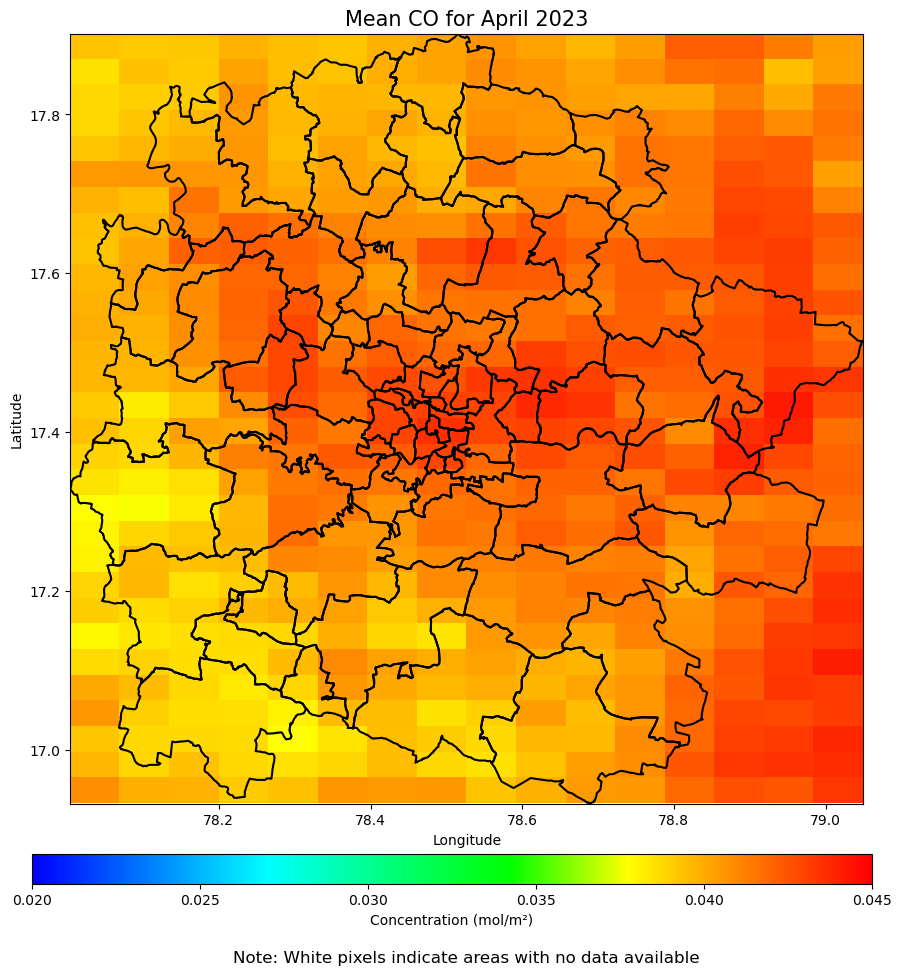

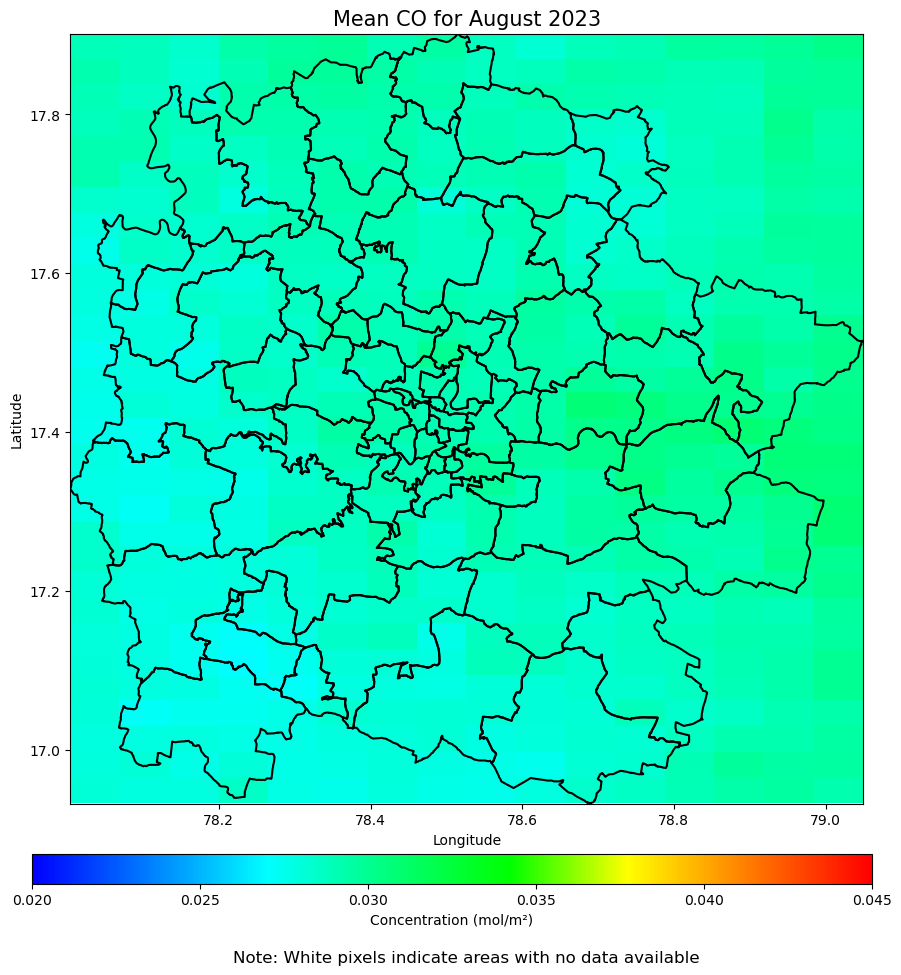

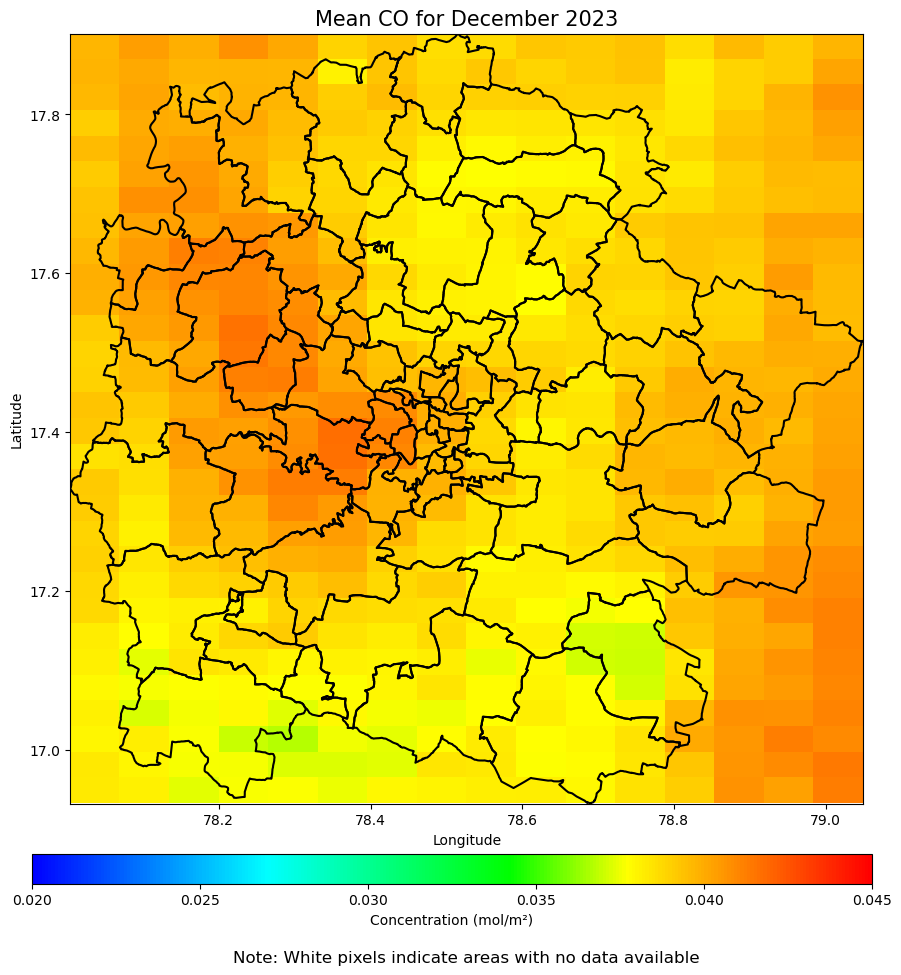

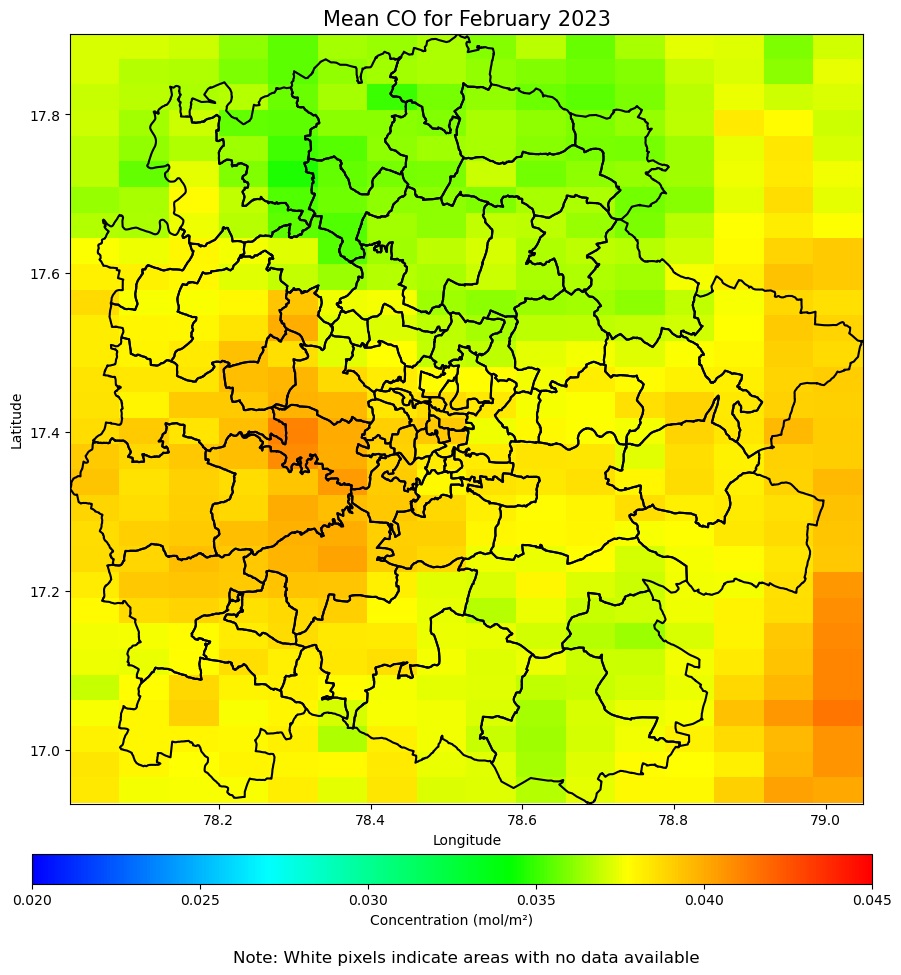

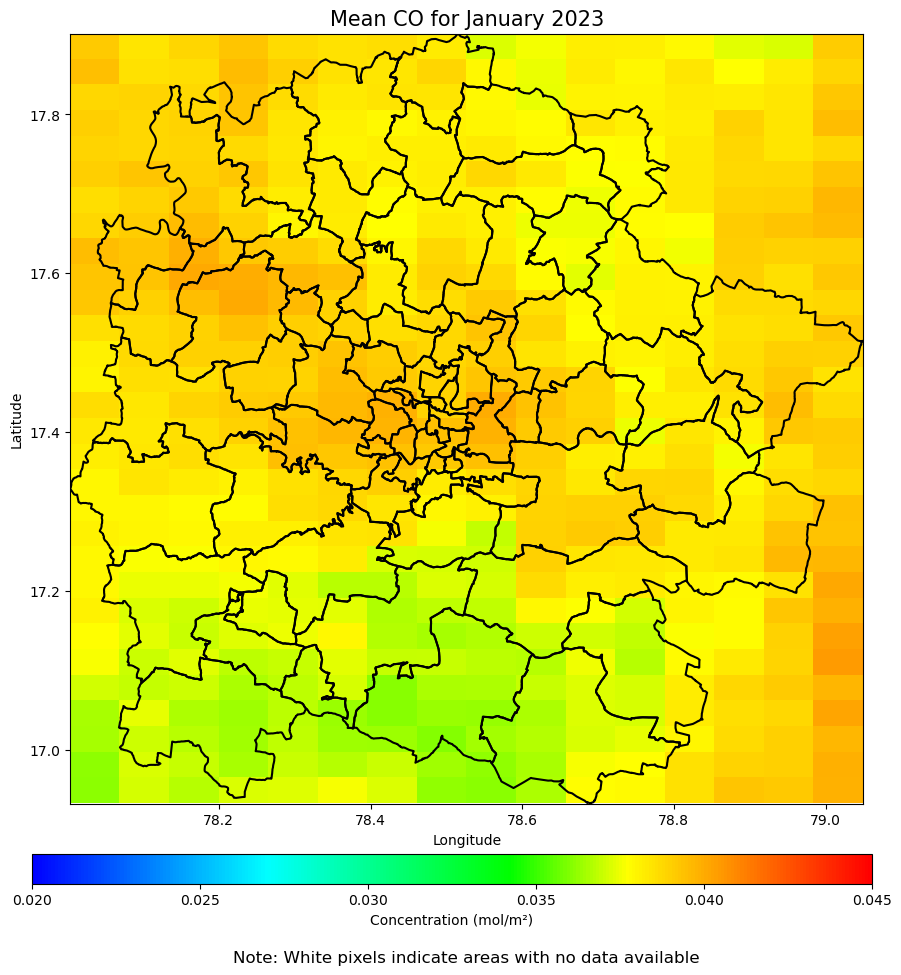

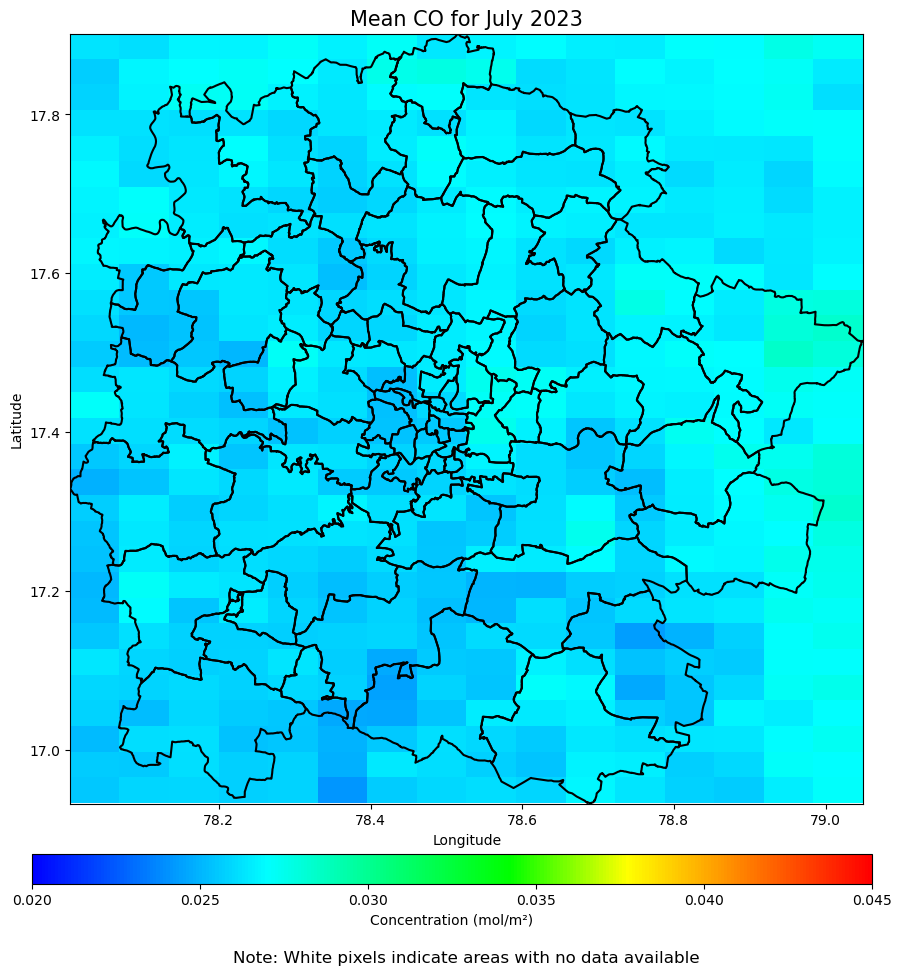

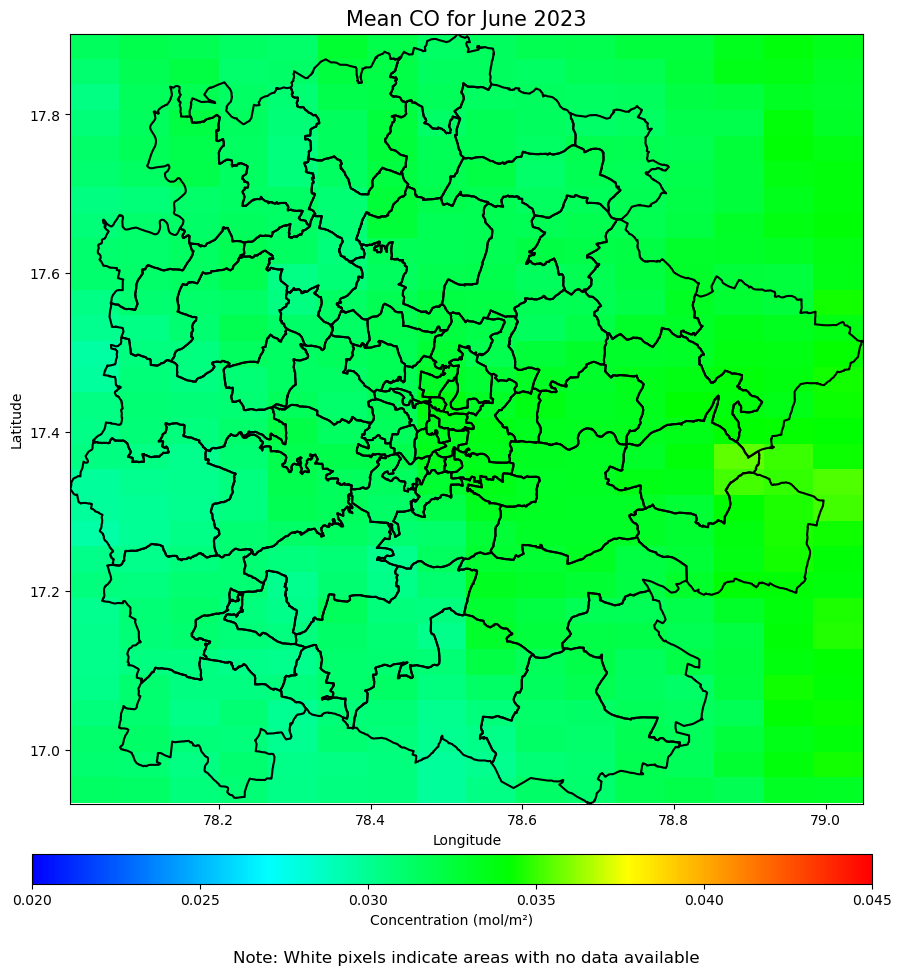

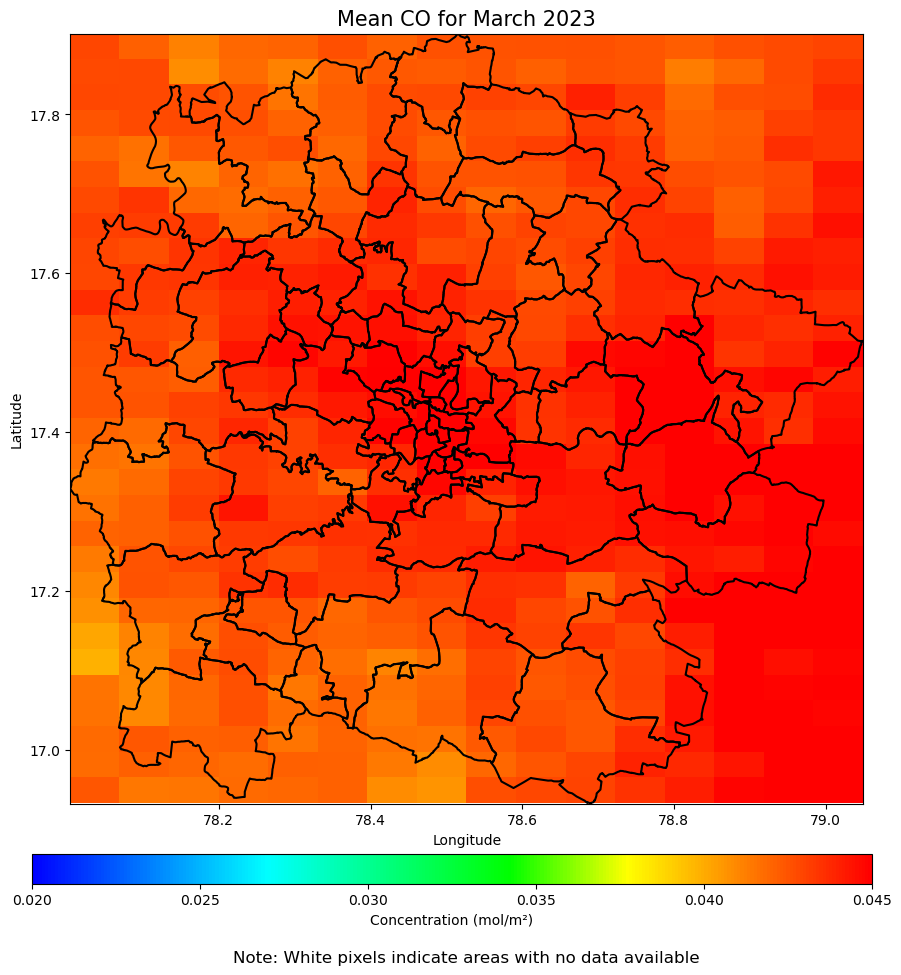

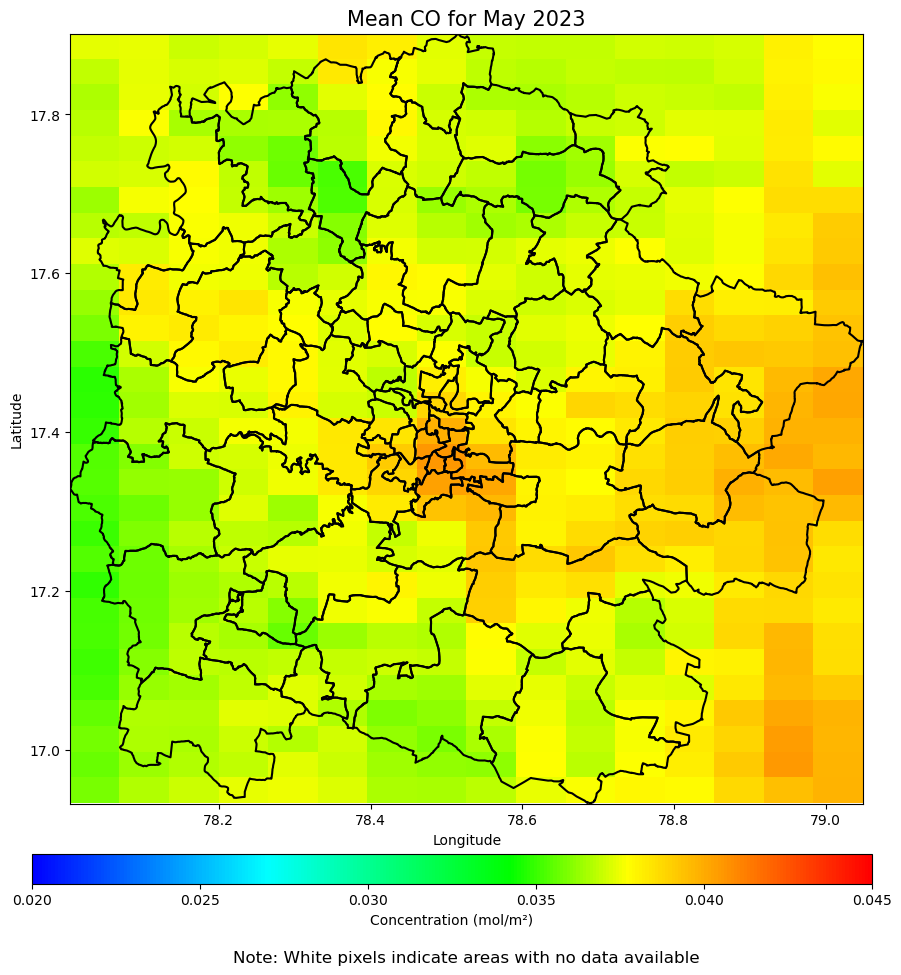

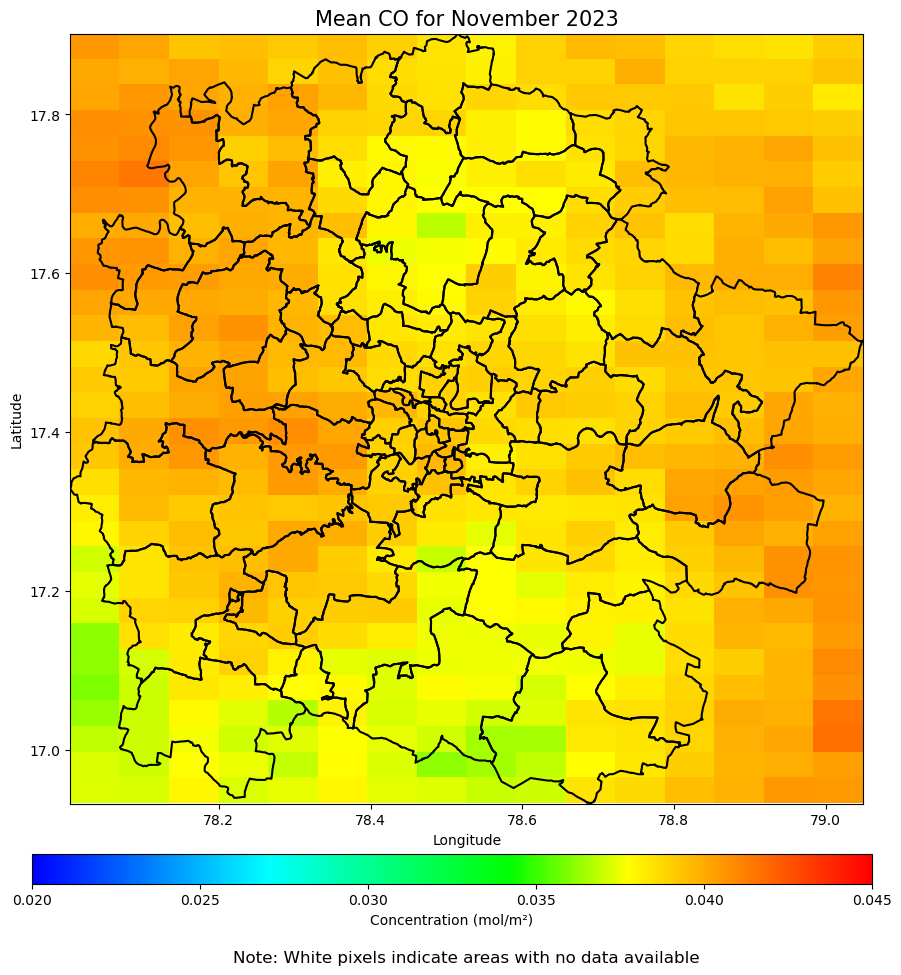

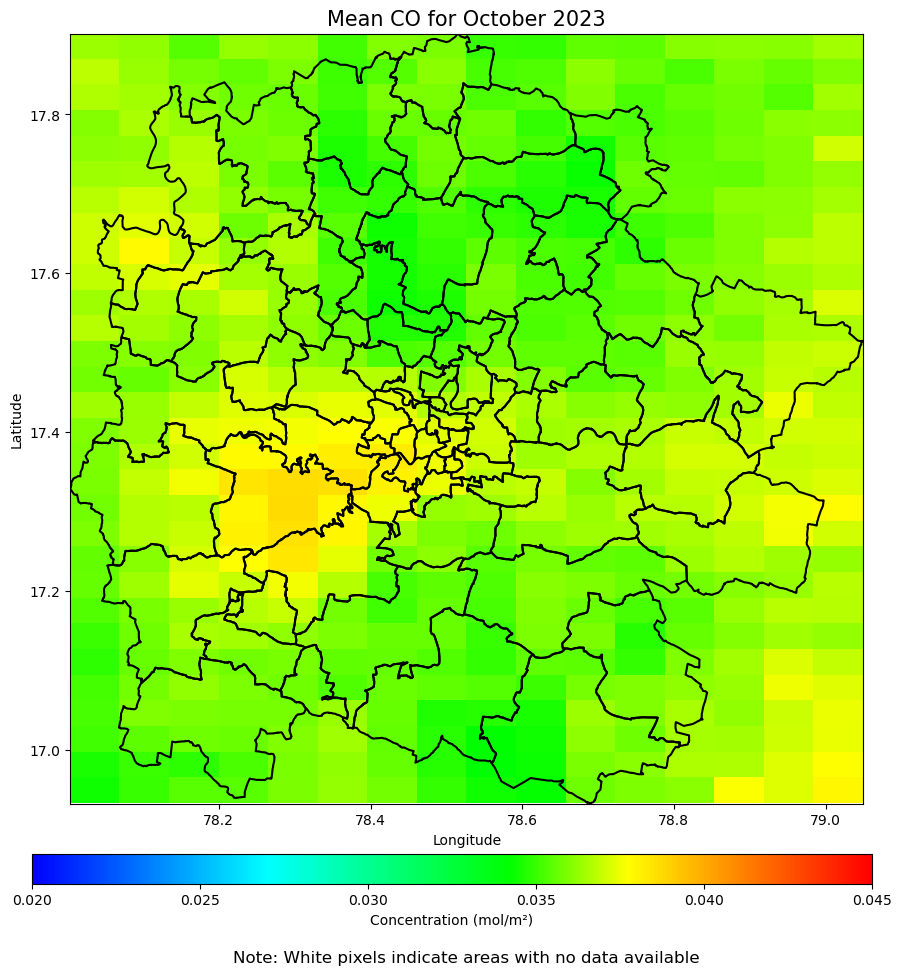

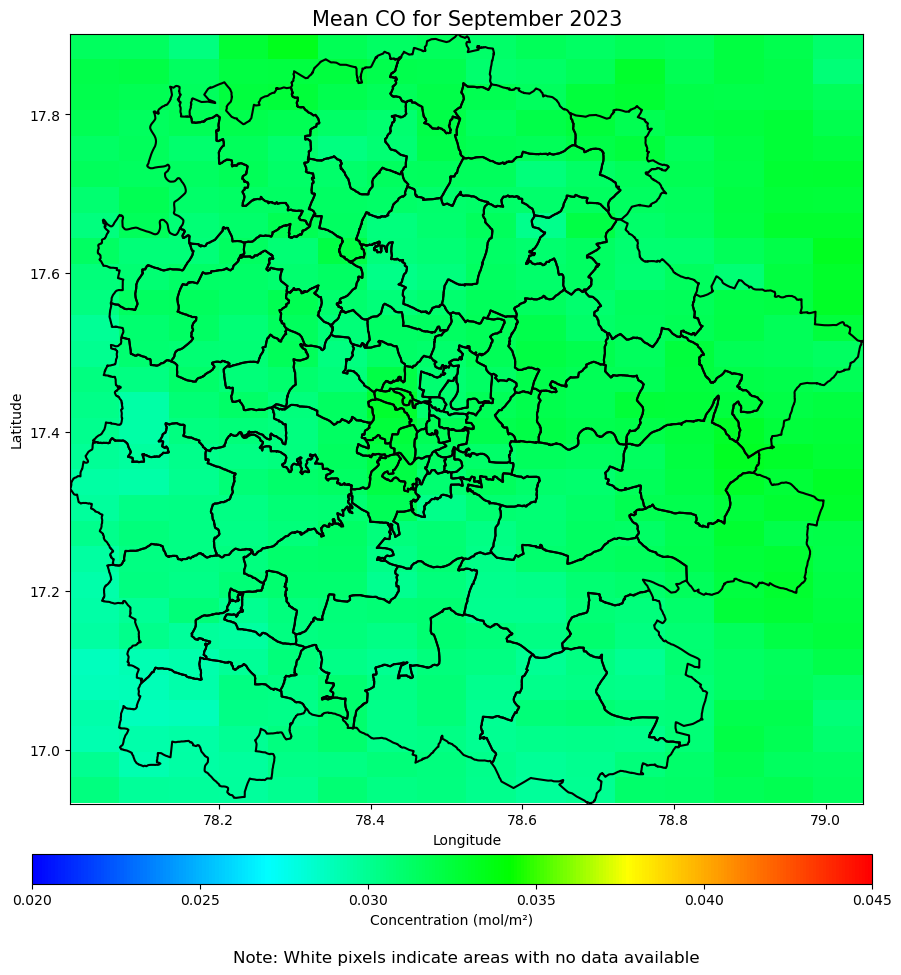

In [23]:
import os

pic_dir=r"C:\Users\rishi\ml_projects\climate\2023_tifs\CO"
output_dir=r"C:\Users\rishi\ml_projects\climate\2023_images\CO"
months = {
    1: ("January", 31),
    2: ("February", 28),
    3: ("March", 31),
    4: ("April", 30),
    5: ("May", 31),
    
    6: ("June", 30),
    7: ("July", 31),
    8: ("August", 31),
    9: ("September", 30),
    10: ("October", 31),
    11: ("November", 30),
    12: ("December", 31)
}
for pic in os.listdir(pic_dir):
    out=os.path.join(output_dir,pic)
    new_file=pic.split('.')[0]+'.png'
    splits=pic.split('_')
    year=splits[0]
    rest=splits[1]
    month=rest.split('.')[0]
    plot_geotiff_image(pic, f"Mean CO for {month} {year}",new_file)